In [ ]:
%load_ext autoreload
%autoreload 2

import torch
from PIL import Image

import sys
sys.path.append('..')

from kandinsky3 import get_T2I_unet, get_T5encoder, get_movq, get_inpainting_unet
from kandinsky3 import Kandinsky3T2IPipeline, Kandinsky3InpaintingPipeline

In [2]:
device = torch.device('cuda')

In [17]:
unet, null_embedding, projections_state_dict = get_T2I_unet(
    device,
    'path/to/weights/',
    fp16=True
)

100%|██████████| 72/72 [00:03<00:00, 18.30it/s]


In [4]:
processor, condition_encoders = get_T5encoder(
    device,
    'path/to/encoder', 
    projections_state_dict,
    fp16=False
)

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [24]:
movq = get_movq(
    device,
    'path/to/movq',
    fp16=False
)

## Text to image

In [25]:
t2i_pipe = Kandinsky3T2IPipeline(device, unet, null_embedding, processor, condition_encoders, movq, fp16=True)

In [26]:
res = t2i_pipe("masterpiece, award winning, best quality, high quality, extremely detailed, cinematic shot, 1girl, adventurer, \
riding on a dragon, fantasy theme, HD, 64K", images_num=4, bs=4)

100%|██████████| 50/50 [00:21<00:00,  2.32it/s]


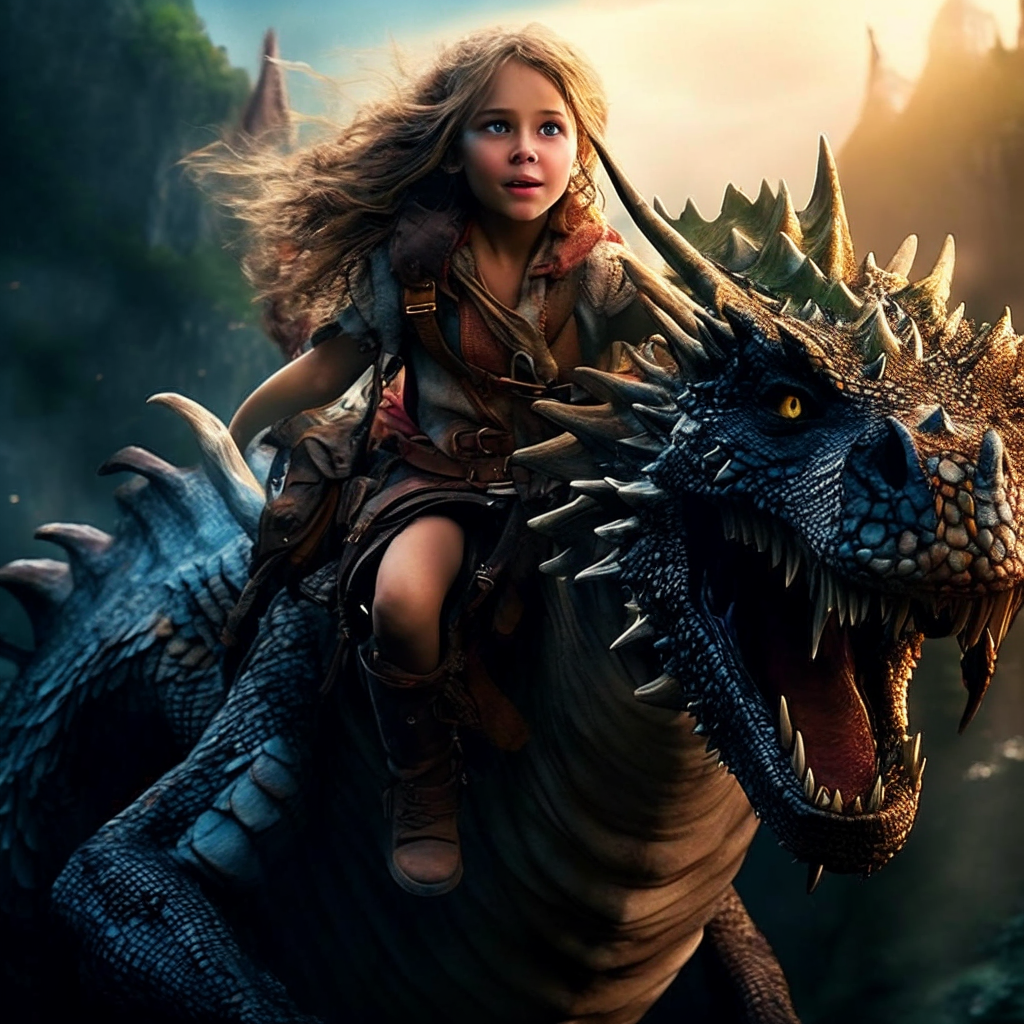

In [27]:
res[0]